In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from mlxtend.plotting import plot_confusion_matrix
pd.set_option('display.max_columns',100)

In [2]:
#import the csv file , show the head of data
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore data 

In [3]:
# we are going to explore the data
c=list(df.columns)
c




['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [4]:
df.shape

(284807, 31)

As shown the data is too big for modeling (284807 rows), that mean we take a sample of it to be ready for model and try it ..

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No Null value

In [7]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

As shown the mean in class very close to (0), that show that must of data have value (0) 


# EDA

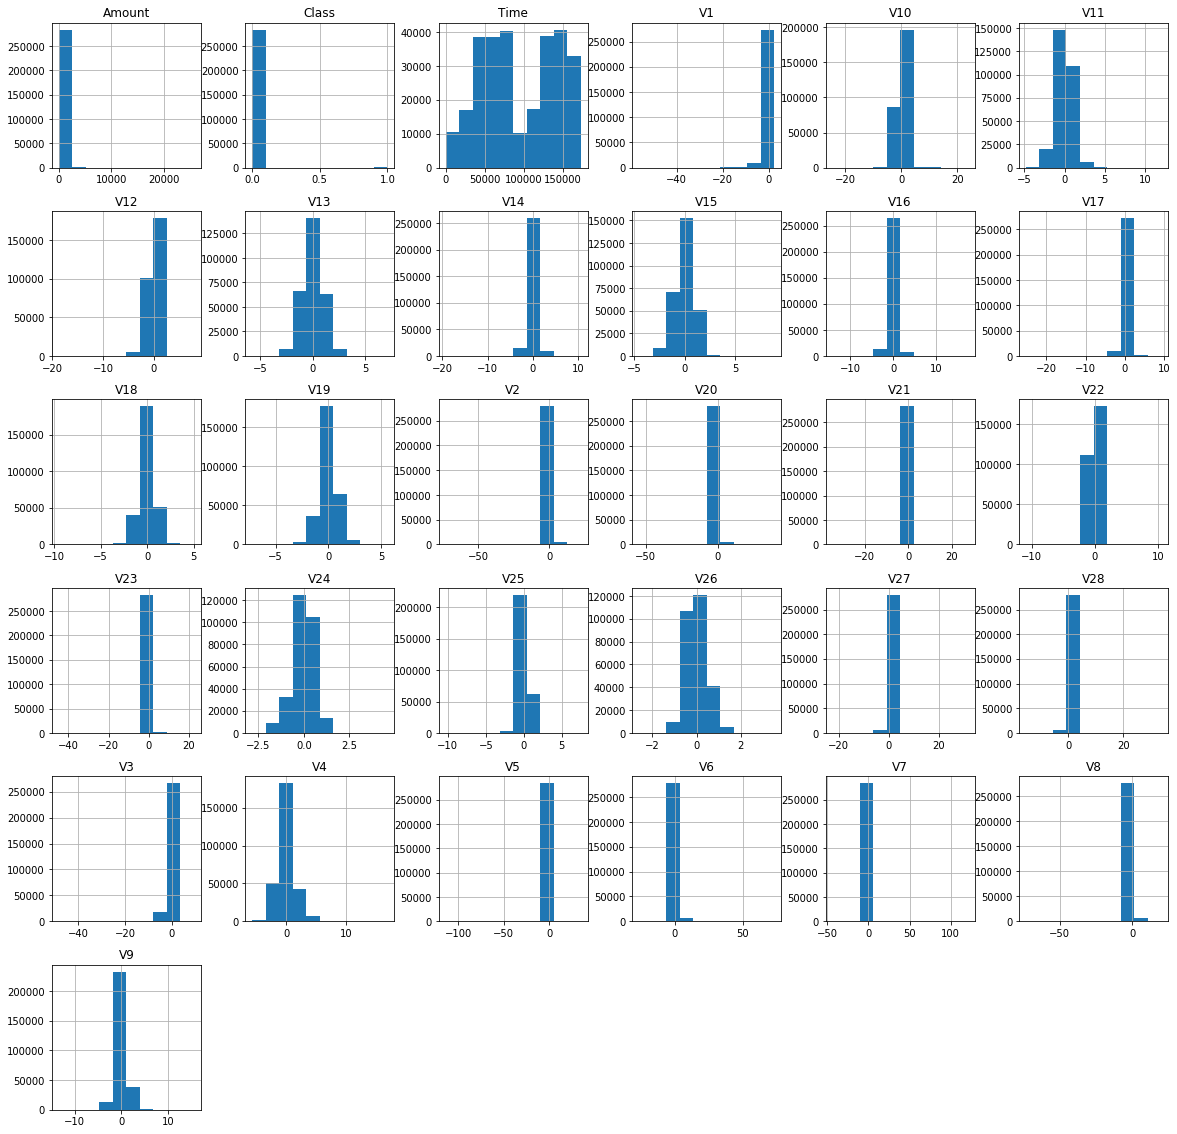

In [8]:
# we create a histogram for whole data to explore it
df.hist(figsize=(20,20))
plt.show()
# A fast View on Features Distribution.

In [9]:
cl=list(df.columns)
cl.pop(-1)
cl
# List for the loop without the Class Feature which will be common X-Axis

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

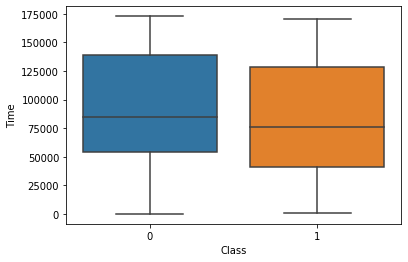

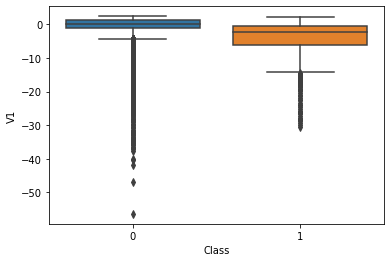

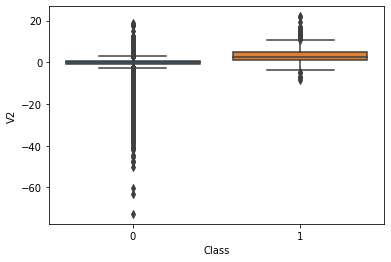

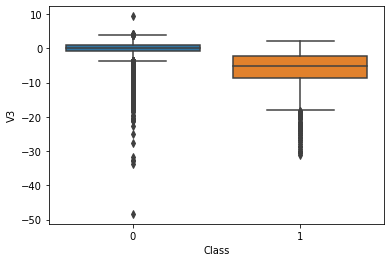

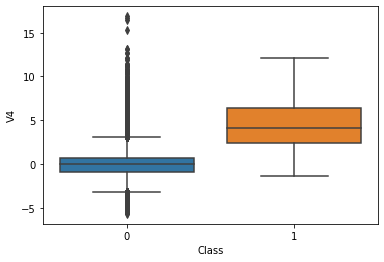

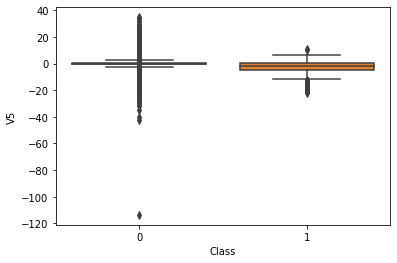

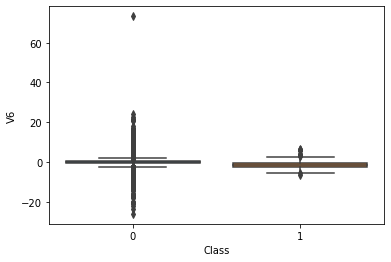

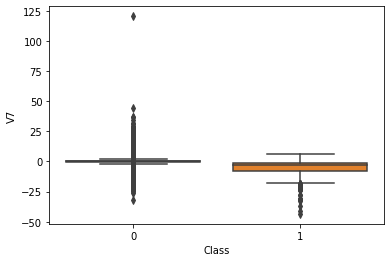

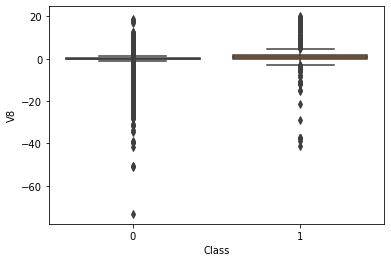

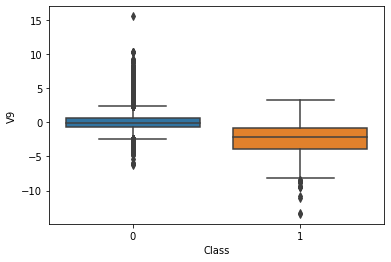

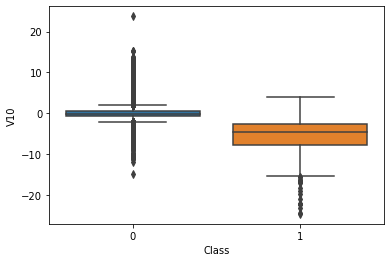

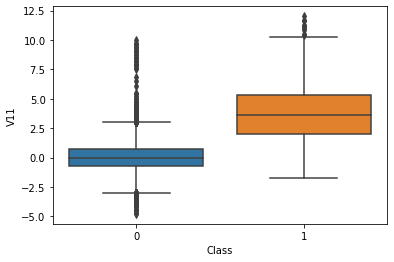

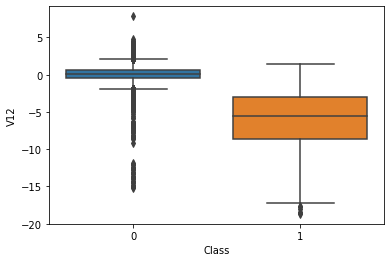

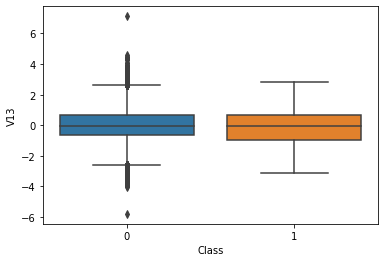

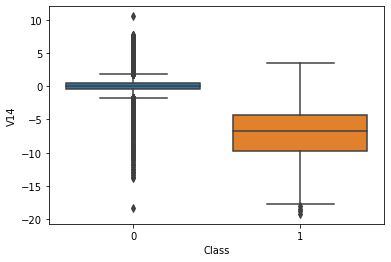

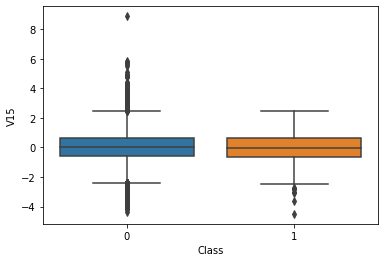

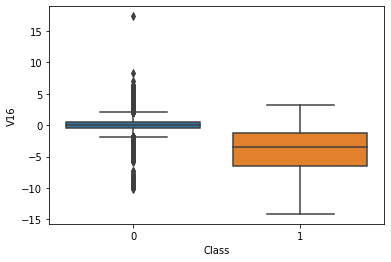

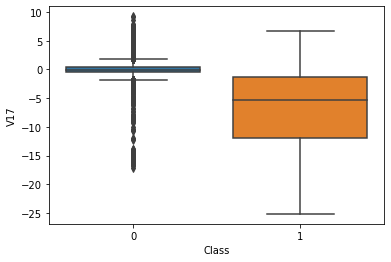

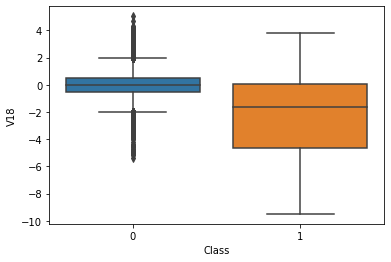

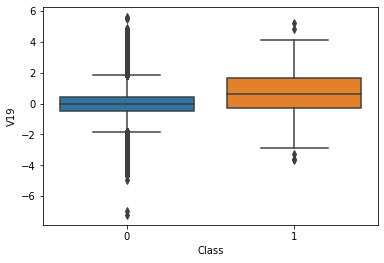

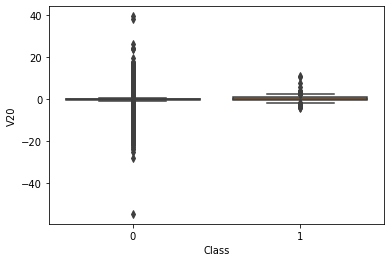

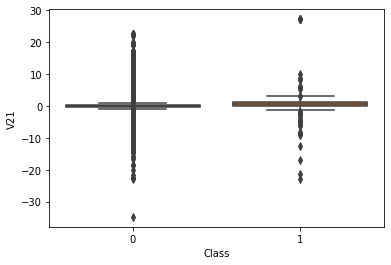

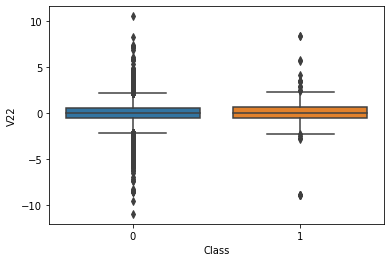

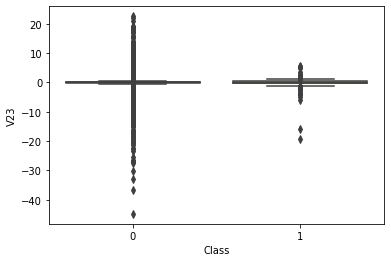

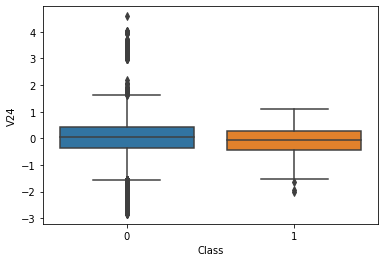

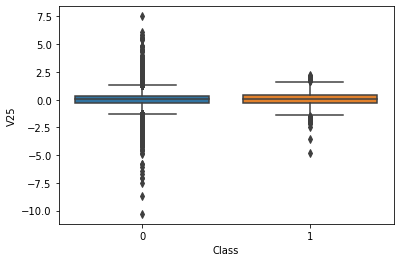

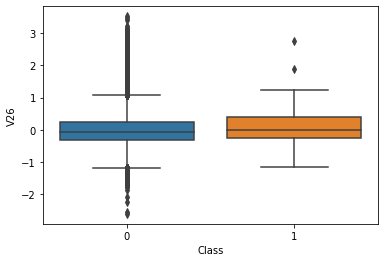

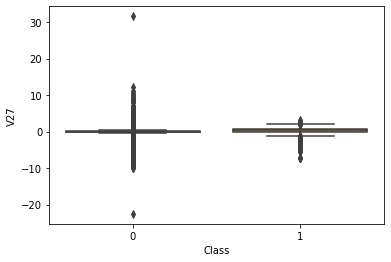

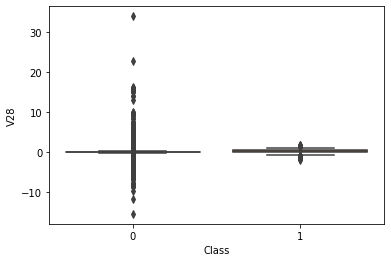

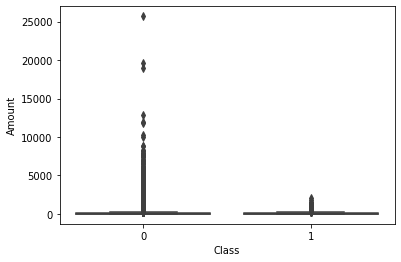

In [10]:

for i in cl:
    sns.boxplot(x=df["Class"],y=df[i])
    plt.show()
# We can see Features like (Time,v1,2,3,4,9,10,11,12,14,16,17,18,19) can distinguish and help classifying data ino 2 classes >>>> 
#Others according to the plots lies in same distribution range
    

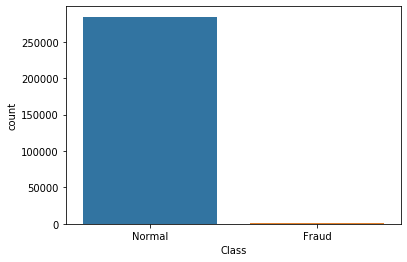

In [11]:
sns.countplot(x="Class",data=df)
plt.xticks(range(2),["Normal","Fraud"])
plt.show()
#Data is very biased ......... Other Class percentage is very huge relatively to the other

In [12]:
# we divide the class in 2 dataframe on with fraud values and the other with normal values
fraud= df[df["Class"]==1]
normal= df[df["Class"]==0]
print("The number of Fraud cases : {}".format(len(fraud)))
print("The number of Normal cases : {}".format(len(normal)))


The number of Fraud cases : 492
The number of Normal cases : 284315


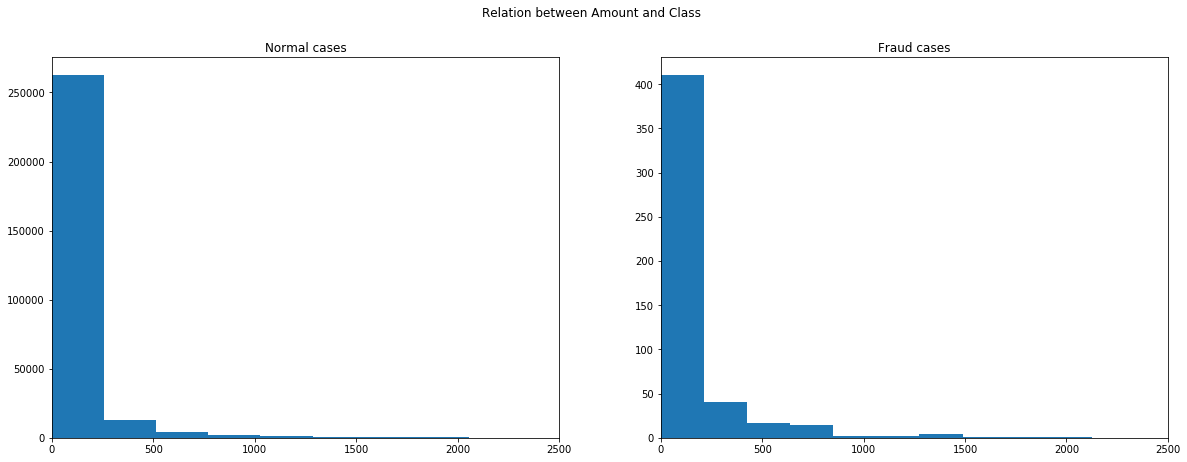

In [13]:
# now we can find if there any relation between the Amount and Time with fraud and normal
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7),sharex=True)
fig.suptitle("Relation between Amount and Class")
ax1.hist(normal["Amount"],bins=100)
ax1.set_title("Normal cases")
ax2.hist(fraud["Amount"],bins=10)
ax2.set_title("Fraud cases")
plt.xlim(0,2500)
plt.show()


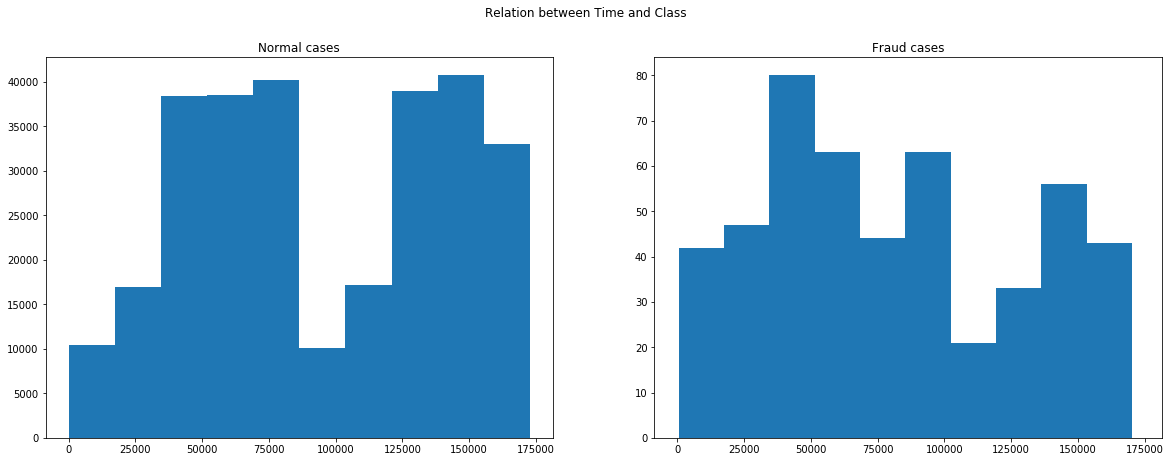

In [14]:
# now we can find if there any relation between the time and Time with fraud and normal
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7),sharex=True)
fig.suptitle("Relation between Time and Class")
ax1.hist(normal["Time"],bins=10)
ax1.set_title("Normal cases")
ax2.hist(fraud["Time"],bins=10)
ax2.set_title("Fraud cases")
plt.show()

In [15]:
df_corr=df.corr()
df_corr
#We concluded some Features have good correlation with the Class as (V1,)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

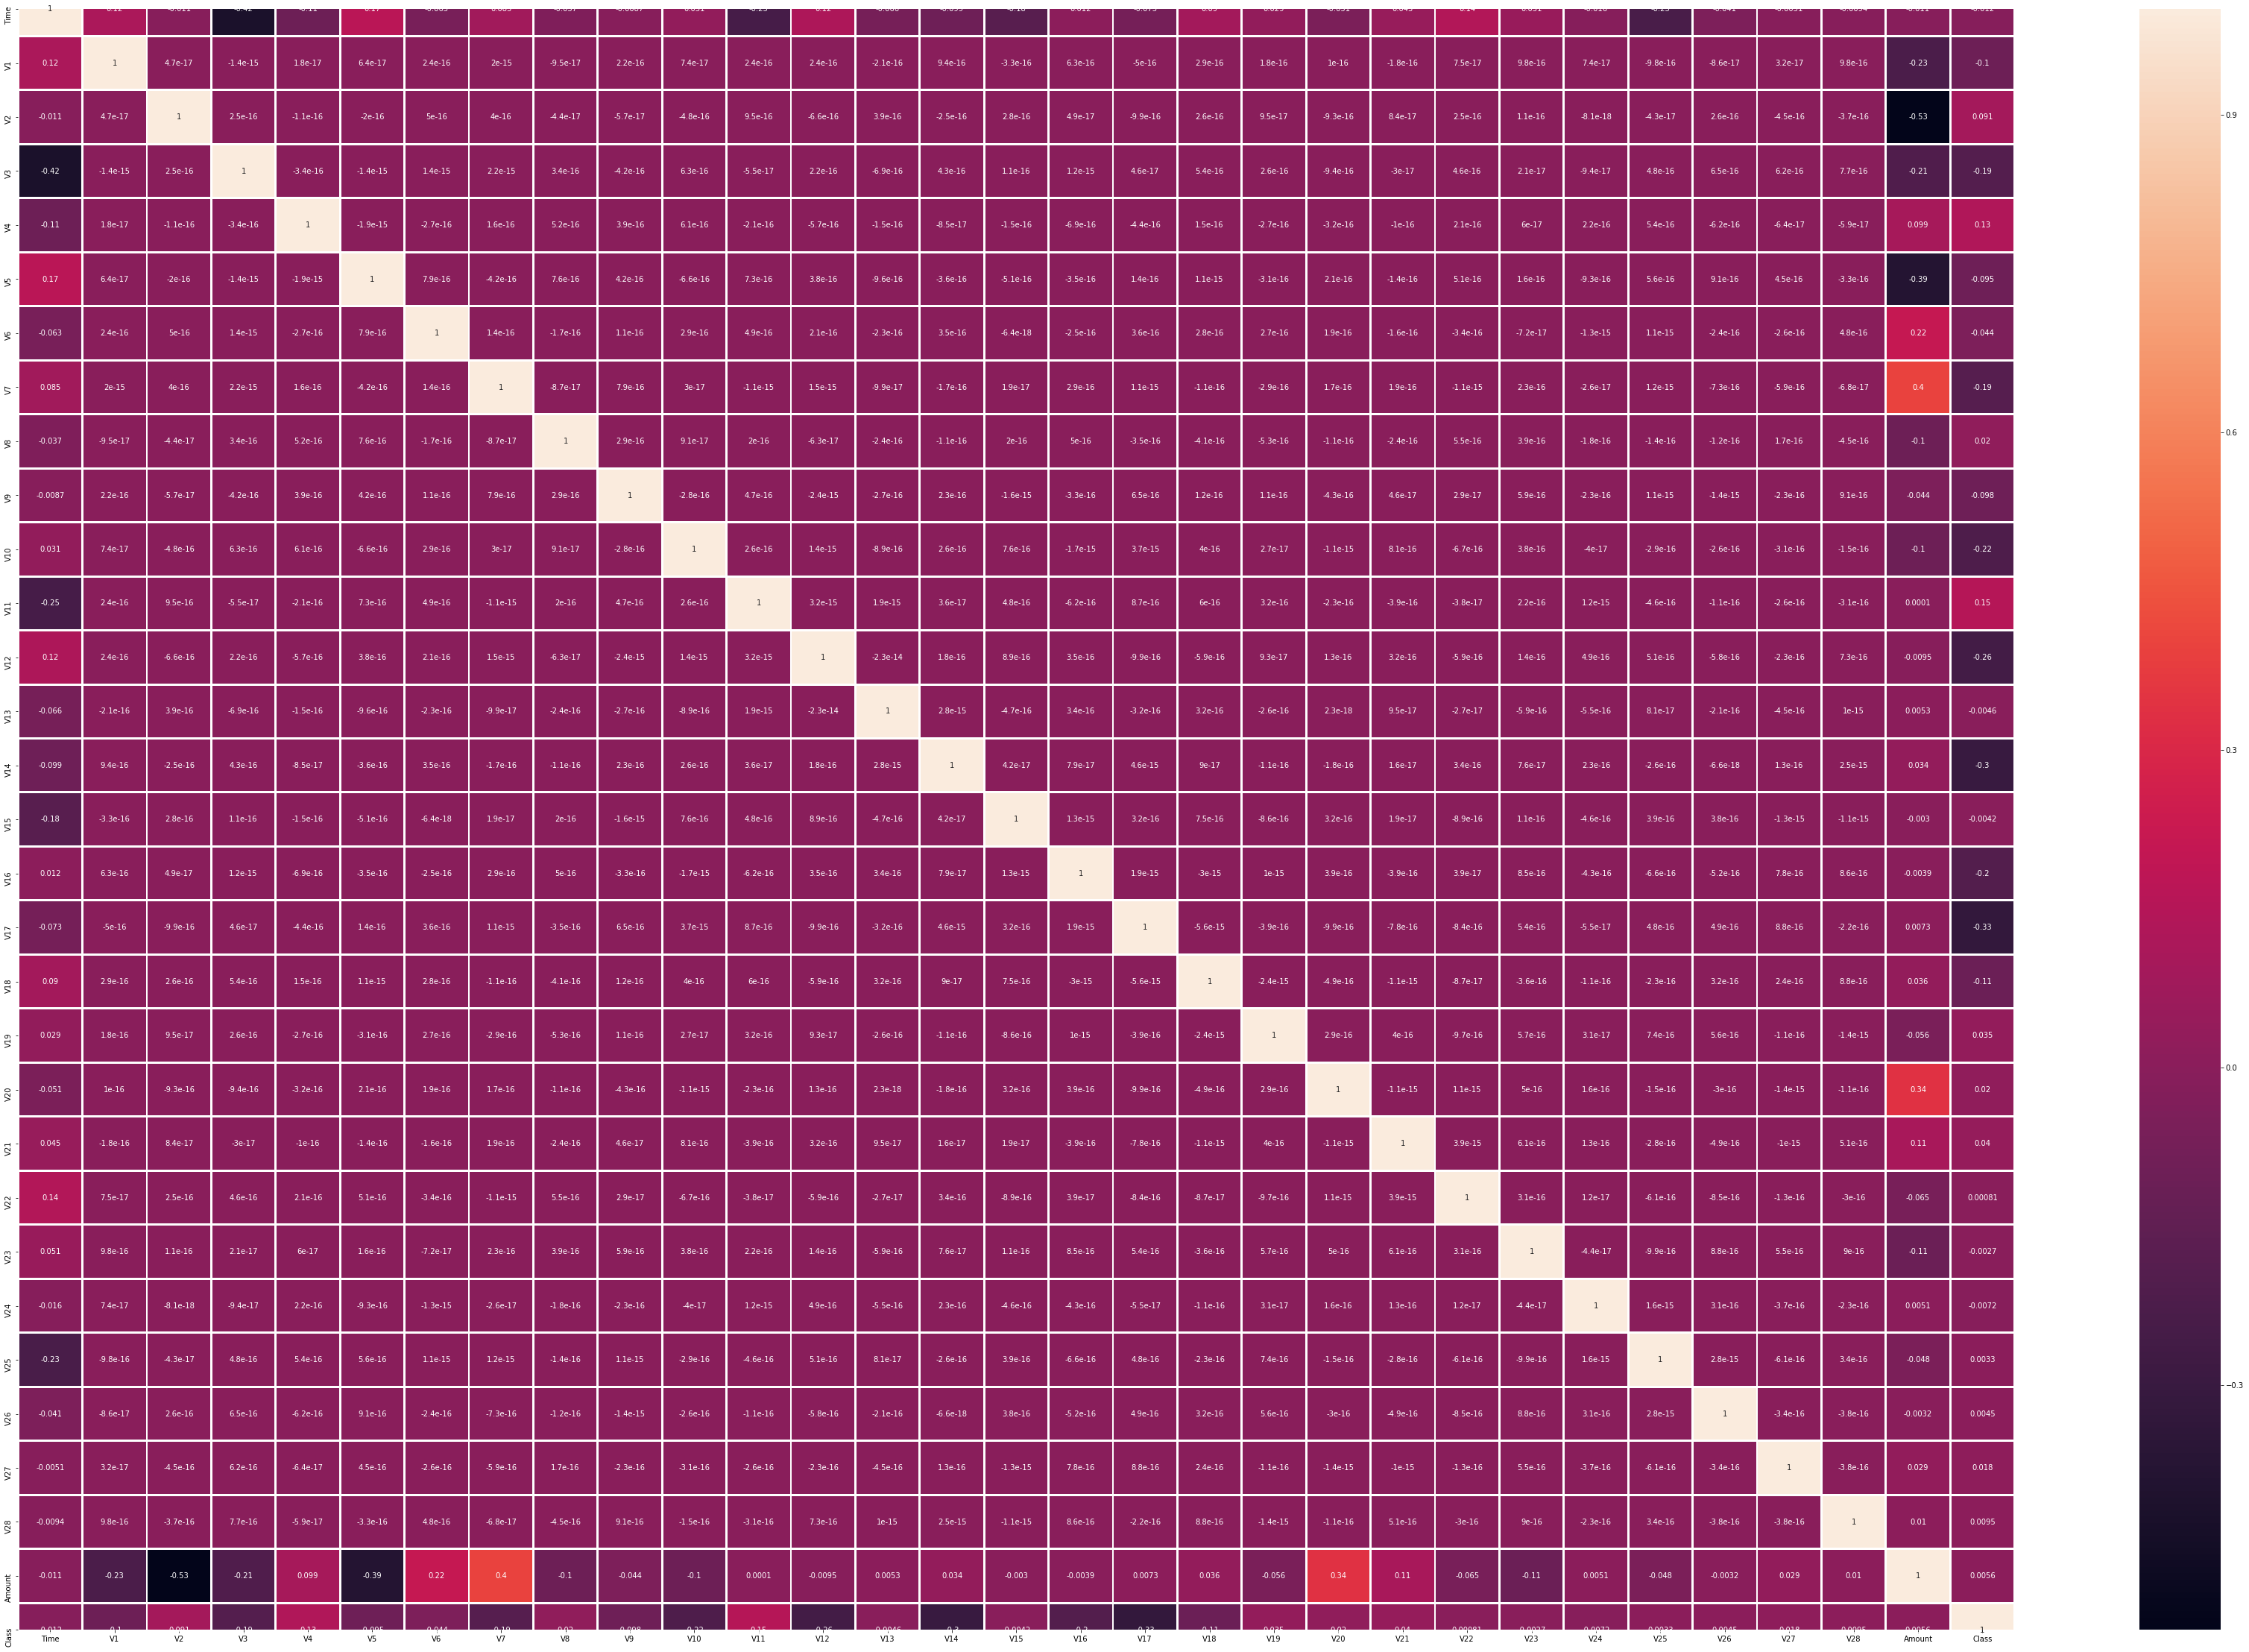

In [16]:
# Heatmap to find the correlation between columns in df2

fig=plt.figure(figsize=(60,40))
sns.heatmap(df_corr,annot=True,linewidths=2)
plt.show()
#Some Classes has correlation relation with class but not strong >>>> Others no correlations at all

There is not too much strong correlatin relations between features and with the Class feature

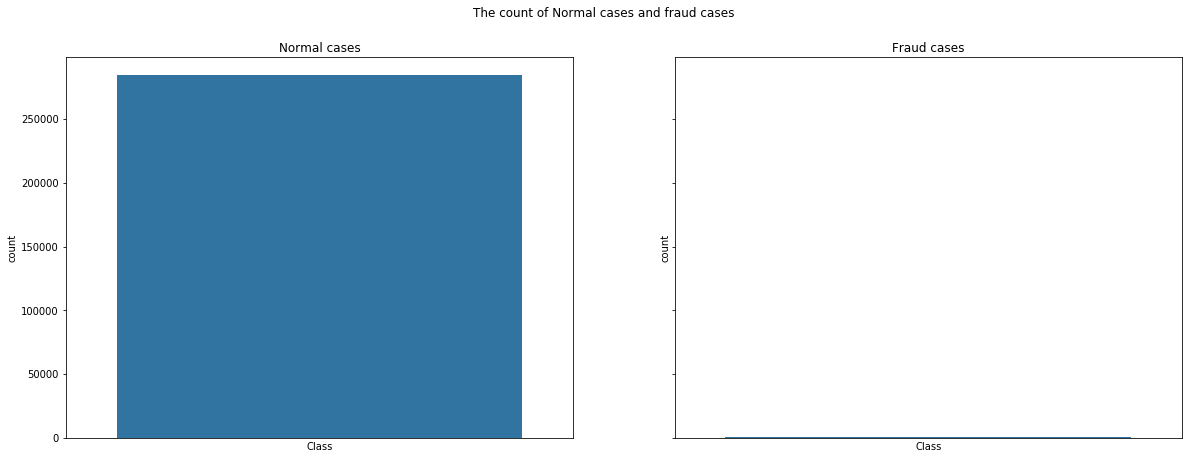

The number of Fraud cases : 492
The number of Normal cases : 284315


In [17]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(20,7),sharex=True,sharey=True)
fig.suptitle("The count of Normal cases and fraud cases ")
sns.countplot(normal["Class"],ax=ax1)
ax1.set_title("Normal cases")
sns.countplot(fraud["Class"],ax=ax2)
ax2.set_title("Fraud cases")
plt.xticks(range(0))
plt.show()
print("The number of Fraud cases : {}".format(len(fraud)))
print("The number of Normal cases : {}".format(len(normal)))

As shown there is a big difference in no. of cases betweem Normal and Fraud cases which can affect on modeling ,
so we need to do oversamplig for fraud values or undersampling for normal values or using smote techinque, bec. the model will be biased to class 0 (normal cases) if we dont solve the unbalanced data

# SMOTETOMEK


In [18]:
# We are working on imbalance data using SMOTE TOMEK techique ,
#appling it on whole data before sampling to avoid missing values in sample data,
#first we have to divide data into x and y , 
#we know that over sampling techniques and under sampling both have cost as losing realtions in data or overfitting but in this 
#case we need to oversample as the data is very biased towards Class 1

In [19]:
x=df.drop(["Class"],axis=1).values
y=df["Class"].values

In [20]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [21]:
#smotetomek use both techinique , smote for oversampling and tomek for undersampling
from imblearn.combine import SMOTETomek

In [22]:
smk = SMOTETomek(random_state=39)
x_sm,y_sm=smk.fit_sample(x,y)

In [23]:
x_sm.shape,y_sm.shape

((567560, 30), (567560,))

In [24]:
from collections import Counter
print("the orignal data is : {}".format(Counter(y)))
print("the New data is {}".format(Counter(y_sm)))

the orignal data is : Counter({0: 284315, 1: 492})
the New data is Counter({0: 283780, 1: 283780})


In [25]:
nd=pd.concat([pd.DataFrame(x_sm), pd.DataFrame(y_sm)], axis=1)
nd.columns=c
nd
#New Balanced Data Created to avoid ay Bias


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567555,62288.461364,-4.529340,2.527050,-4.827189,4.519375,-3.173037,-0.987564,-5.099381,1.634113,-1.000507,-4.633520,3.056324,-7.192813,-1.115142,-8.917618,0.601838,-6.611643,-8.896780,-3.615421,2.550176,-0.183105,0.743868,0.415052,0.420067,-0.227133,-0.579761,-0.303274,-1.122494,0.568481,37.112115,1
567556,43224.140716,-3.442635,2.580039,-4.033960,1.224539,-1.479919,-2.072381,-2.809105,-1.827105,-0.484464,-4.913650,3.728990,-6.254620,-1.067626,-8.897078,1.285993,-4.685226,-7.465962,-2.300323,0.499988,-0.022006,1.528150,-0.313177,-0.135264,0.064294,0.193504,-0.794980,-0.886241,-0.881123,73.918706,1
567557,56861.279218,-1.018210,1.918567,-3.122179,4.438332,-2.019462,-0.757220,-4.073362,1.098576,-2.673126,-4.023440,4.365464,-5.779996,-2.030634,-5.847672,0.206429,-3.912806,-8.032611,-2.596726,-0.084747,0.251887,0.698337,0.278949,-0.122488,-0.032991,0.589215,0.226318,0.686601,0.328428,5.273487,1
567558,96857.209173,-8.658436,7.147051,-9.277162,5.054097,-7.197426,0.836487,-14.536485,-9.469595,-3.161875,-10.087715,3.353136,-7.695835,1.276131,-3.070981,0.562848,-5.906857,-8.954127,-2.950199,2.270506,3.216309,-5.082885,2.915202,1.115120,-0.032855,-0.200687,-0.238054,-1.335990,-0.250530,3.651480,1


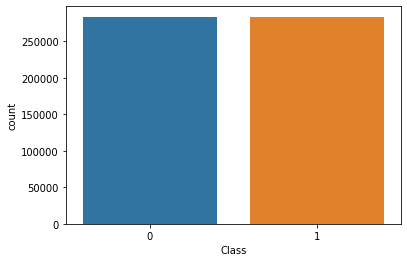

In [26]:
sns.countplot(x=nd["Class"])
# we have now 2 balanced Classes

# Split data into training and testing sets

In [27]:
from sklearn.model_selection import train_test_split
x=nd.drop("Class",axis=1).values
y=nd['Class'].values


In [28]:
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 5.68612792e+04, -1.01820980e+00,  1.91856684e+00, ...,
         6.86600534e-01,  3.28427724e-01,  5.27348679e+00],
       [ 9.68572092e+04, -8.65843614e+00,  7.14705117e+00, ...,
        -1.33599025e+00, -2.50529887e-01,  3.65148040e+00],
       [ 6.56722357e+04,  7.73879755e-01,  3.40814016e-01, ...,
         2.48264474e-01,  1.31484307e-01,  2.06271323e+01]])

In [29]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

# Modeling

# Decision Tree 


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [32]:
dt=DecisionTreeClassifier().fit(X_train,y_train) # Model taraining (fitting)

In [33]:
dt_pred=dt.predict(X_test)

In [34]:
print("Decision Tree Classifier accuracy is : ",accuracy_score(dt_pred,y_test)*100,"%")

Decision Tree Classifier accuracy is :  99.84706462752837 %


# Confusion Matrix

In [35]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,f1_score
cnf_matrix = metrics.confusion_matrix(y_test, dt_pred)
cnf_matrix
# As in this Case we need he confusion Matrix to Focus on the Recall and precision values >>>> Especially Recall

array([[70512,   155],
       [   62, 71161]], dtype=int64)

In [36]:
f1_score(y_test,dt_pred)

0.9984776096366609

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8b576d48>)

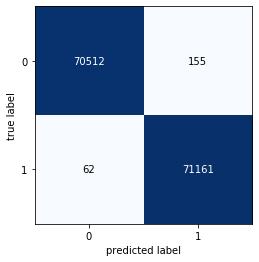

In [37]:
plot_confusion_matrix(cnf_matrix)
#As we See the Percentage is good but not the best we can get yet

# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf=RandomForestClassifier().fit(X_train,y_train)  # Model taraining (fitting)

In [40]:
rf_pred=rf.predict(X_test)  # predict new data

In [41]:
crf_matrix = metrics.confusion_matrix(y_test, rf_pred)
crf_matrix
# Very Good Accuracy

array([[70656,    11],
       [    3, 71220]], dtype=int64)

In [42]:
f1_score(y_test,rf_pred)

0.9999017226613502

In [43]:
print("Random Forest Classifier accuracy is : ",accuracy_score(rf_pred,y_test)*100,"%")

Random Forest Classifier accuracy is :  99.99013320177602 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8bb33c08>)

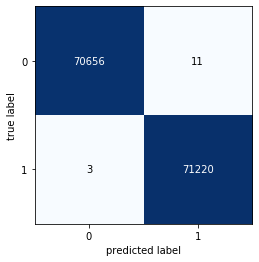

In [44]:
plot_confusion_matrix(crf_matrix)
#Best Results till now

In [107]:
f1_score(y_test,rf_pred)

0.9999017226613502

# Try Modeling and testing by just a sample of the data

In [45]:
nd2=nd.sample(frac=0.1,random_state=100)
nd2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
454742,149537.403168,0.835521,2.525468,-5.325401,4.141432,0.362057,-1.385674,-1.606378,0.664083,-2.028304,-3.381288,3.808514,-3.034455,-0.146609,-7.032778,0.024719,-2.077048,-1.102808,0.482835,1.569072,0.363398,0.345604,-0.040837,0.124482,0.325352,-0.287285,-0.202204,0.338742,0.025591,1.622806,1
312217,20050.958758,-14.792686,7.931351,-21.930360,11.903574,-8.395116,-2.270497,-15.878627,0.132024,-6.353952,-13.250890,10.048358,-14.373691,0.662500,-14.217999,-0.308359,-8.148909,-12.261178,-4.816237,0.715610,0.996052,-2.361667,1.095631,1.043227,-1.036787,-0.245718,0.643286,2.159650,-1.401970,1.000000,1
29533,35556.000000,-1.258604,0.013785,1.581423,0.247275,0.461293,-0.380866,0.708881,0.243182,-0.653856,-0.529834,1.174329,-0.069058,-1.680331,0.756578,0.013133,0.227184,-0.532887,0.249566,-1.173007,0.114652,0.345308,0.521621,0.116721,0.159727,0.179468,-0.435151,0.030294,0.113159,120.400000,0
459376,147359.254573,-1.739353,0.447741,-2.961436,4.684212,-2.295971,1.216880,0.856280,-1.443615,-2.270863,-1.288093,1.068941,-2.436585,-0.502101,-2.338091,-0.951876,-1.996712,-2.797361,-0.436716,1.014714,1.340701,2.646109,0.082853,1.746572,-0.343835,0.445848,0.298644,-0.093501,-0.021199,717.775462,1
510422,169349.805758,-0.062690,1.175036,-3.046847,0.750013,-0.653855,-0.398398,-1.989451,0.923053,-0.794110,-3.394703,2.112487,-2.871126,-0.530487,-4.401396,-0.683114,-1.767904,-4.507408,-0.561190,0.407009,0.241450,0.638010,0.593506,0.090453,-0.001703,-0.363040,0.551232,0.386315,0.192055,54.862030,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132387,80080.000000,1.217086,-0.034575,0.869318,1.104653,-0.451698,0.388735,-0.544517,0.127605,0.888008,-0.215985,-1.608897,0.403535,0.686682,-0.514016,0.200139,0.349565,-0.641034,0.208110,0.163511,-0.063492,-0.120917,-0.121583,-0.137523,-0.599107,0.564081,-0.348813,0.073583,0.029787,12.990000,0
528160,94214.740067,-17.831597,10.978693,-21.118691,7.107194,-13.512031,-2.406852,-22.163926,-3.789887,-6.902288,-17.480544,5.429267,-12.979599,-0.347473,-5.676233,-1.847029,-10.383218,-17.594575,-7.611842,1.510231,1.401167,-3.526443,2.163630,0.204605,0.610892,-0.267162,-0.492462,-3.666841,-0.736724,30.638560,1
302651,41203.928215,-8.439317,6.154401,-11.558999,6.810229,-8.159949,-3.630538,-12.352449,5.605964,-6.290942,-13.306187,7.565516,-13.379893,0.826660,-14.916880,1.496035,-11.776981,-20.397904,-7.621668,3.765719,0.523829,2.209696,-0.212588,0.008947,0.410746,0.016126,0.519882,0.821618,0.077158,34.421352,1
559663,8793.219066,-3.819203,2.201999,-3.506759,3.886839,-1.944308,-1.378959,-4.485673,0.828543,-0.081953,-5.988696,5.241081,-10.206468,0.165665,-8.829340,-0.699971,-6.422169,-8.785455,-3.286700,1.341800,0.076874,0.535765,-0.045916,0.079577,-0.134044,-0.081600,-0.213075,-0.590478,0.693144,1.071018,1


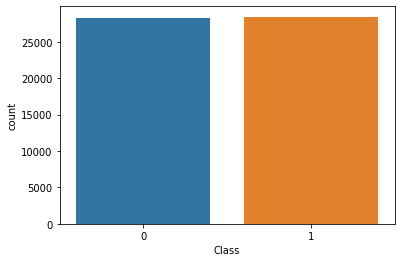

In [46]:
sns.countplot(x=nd2["Class"])
#Not Biased 

In [47]:
x1=nd2.drop("Class",axis=1).values
y1=nd2['Class'].values
# Dividing data

In [48]:
x1

array([[ 1.49537403e+05,  8.35521167e-01,  2.52546831e+00, ...,
         3.38741710e-01,  2.55910075e-02,  1.62280576e+00],
       [ 2.00509588e+04, -1.47926857e+01,  7.93135104e+00, ...,
         2.15965011e+00, -1.40197032e+00,  1.00000000e+00],
       [ 3.55560000e+04, -1.25860447e+00,  1.37845033e-02, ...,
         3.02938658e-02,  1.13159445e-01,  1.20400000e+02],
       ...,
       [ 4.12039282e+04, -8.43931706e+00,  6.15440148e+00, ...,
         8.21618454e-01,  7.71577791e-02,  3.44213523e+01],
       [ 8.79321907e+03, -3.81920282e+00,  2.20199868e+00, ...,
        -5.90478246e-01,  6.93144133e-01,  1.07101778e+00],
       [ 1.60019000e+05, -4.71134369e-01, -5.17449900e-01, ...,
         1.66747775e-01,  1.06031036e-02,  9.33000000e+00]])

In [49]:
y1

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.1, random_state=22)

In [51]:
rf1=RandomForestClassifier().fit(X_train,y_train)  # Model taraining (fitting)

In [52]:
rf_pred1=rf1.predict(X_test)  

In [53]:
crf1_matrix = metrics.confusion_matrix(y_test, rf_pred1)
crf1_matrix

array([[2888,    2],
       [   6, 2780]], dtype=int64)

In [54]:
f1_score(y_test,rf_pred1)
# Good Score till now

0.9985632183908046

In [55]:
print("Random Forest Classifier accuracy is : ",accuracy_score(rf_pred1,y_test)*100,"%")

Random Forest Classifier accuracy is :  99.85905567300915 %


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8bfee8c8>)

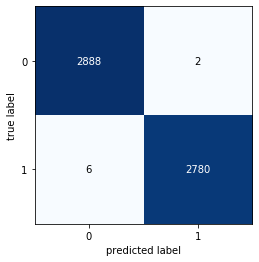

In [56]:
plot_confusion_matrix(crf1_matrix)
#Recall and Prec. accepted values but note we made the test on only remaining 10% of this small size data Sample >>>> let's try to predict 
#Remaining huge data

In [57]:
rp=rf1.predict(x)  
# now let's try model trained on a very small amount od data on the Actual sample which is relatively very huge

In [58]:
print("Random Forest Classifier accuracy is : ",accuracy_score(rp,y)*100,"%")
# Good Score

Random Forest Classifier accuracy is :  99.83843117908239 %


In [59]:
crf2_matrix = metrics.confusion_matrix(rp, y)
crf2_matrix
# recall and prec. not bad but false positive has increased but compaared to true positive thats good .... 
#Also False negative percentage is accepted ill now for me

array([[283473,    610],
       [   307, 283170]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8dd84588>)

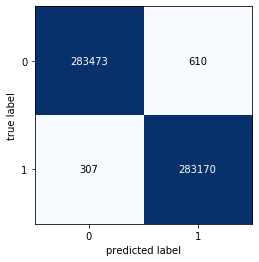

In [60]:
plot_confusion_matrix(crf2_matrix)

In [61]:
f1_score(y,rp)
#F1 Score percentage

0.998383448771897

# Apply Grid Search on the Random Forest to find better accuracy if found.

In [62]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = {'min_samples_split':[3,4,5,6], 
              'min_samples_leaf':[2,3,4],
              'n_estimators':[101,102,103]
             }
             # Parameters will be all tried in every possible combination

In [66]:
gsearch = GridSearchCV(rf1, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
print("Best score: ",gsearch.best_score_," acheived by these parameters ",model)
# The Model with parameters resulted will be the best score achieved 

Best score:  0.9976311667971809  acheived by these parameters  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=103,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [85]:
gsp=model.predict(X_test)

In [86]:
print("Random Forest Classifier accuracy is : ",accuracy_score(gsp,y_test)*100,"%")
# Result not better than Default Random Forest Model

Random Forest Classifier accuracy is :  99.8062015503876 %


In [87]:
gsp_matrix = metrics.confusion_matrix(y_test, gsp)
gsp_matrix

array([[2885,    5],
       [   6, 2780]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8dd2ed08>)

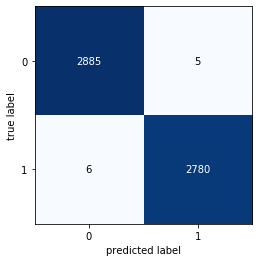

In [88]:
plot_confusion_matrix(gsp_matrix)
# Grid Search found better score with diff. Parameters but that was applied on the sample .... Let's try with the whole data

In [91]:
gspw=model.predict(x)

In [92]:
print("Random Forest Classifier accuracy is : ",accuracy_score(gspw,y)*100,"%")

Random Forest Classifier accuracy is :  99.80354499964761 %


In [96]:
gspw_matrix = metrics.confusion_matrix(y, gspw)
gspw_matrix

array([[283407,    373],
       [   742, 283038]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8c318e08>)

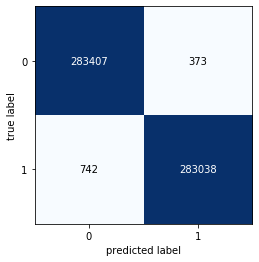

In [97]:
plot_confusion_matrix(gspw_matrix)

In [98]:
f1_score(y,gspw) # Score not better >>>>> slighly less and false negatives are more here which in our case not recommended

0.998034171910344

# Let's Train new Model by the new parameters suggested by the grid search

In [101]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2) #Train and Test Split

In [78]:
rfn=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=103,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False).fit(X_train,y_train)  # Model taraining (fitting)

In [102]:
rfgs_pred=rf.predict(X_test)  # predict new data

In [103]:
print("Decision Tree Classifier accuracy is : ",accuracy_score(rfgs_pred,y_test)*100,"%")

Decision Tree Classifier accuracy is :  99.99013320177602 %


In [104]:
rfgs_matrix = metrics.confusion_matrix(y_test,rfgs_pred)
rfgs_matrix

array([[70656,    11],
       [    3, 71220]], dtype=int64)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x3d8cb93b08>)

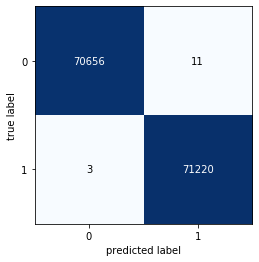

In [105]:
plot_confusion_matrix(rfgs_matrix)

In [106]:
f1_score(y_test,rfgs_pred) # Same Accuracy Score as made by Model with default  Parameters >>>>> We can use the 
# rf_pred or rfgs_pred

0.9999017226613502